In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw3.ipynb")

# Homework 3: Bike Sharing
## Exploratory Data Analysis (EDA) and Visualization
## Due Date: Tuesday 2/23 by 11:59 PM PST

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

## Introduction

Bike sharing systems are a new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike sharing data from Washington D.C. 

In this assignment, you will perform tasks to clean, visualize, and explore the bike sharing data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

* reading plaintext delimited data into `pandas`
* wrangling data for analysis
* using EDA to learn about your data 
* making informative plots

## Grading
Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, your plots should be *similar* to the given examples. We will tolerate small variations such as color differences or slight variations in scale. However it is in your best interest to make the plots as similar as possible, as similarity is subject to the readers.

**Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** 

### Score breakdown



Question | Points
--- | ---
Question 0a | 1
Question 0b | 1
Question 1a | 2
Question 1b | 1
Question 1c | 2
Question 2a | 2
Question 2b | 2
Question 2c | 2
Question 2d | 2
Question 3a | 5
Question 3b | 3
Question 4  | 2
Question 5a | 2
Question 5b | 2
Question 6a | 1
Question 6b | 4
Question 6c | 2
Question 7a | 2
Question 7b | 3
Total | 41

In [2]:
# Run this cell to set up your notebook.  Make sure ds100_utils.py is in this assignment's folder
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import ds100_utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

## Loading Bike Sharing Data
The data we are exploring is collected from a bike sharing system in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Download the Data

In [3]:
# Run this cell to download the data.  No further action is needed

data_url = 'https://github.com/DS-100/fa20/raw/gh-pages/resources/assets/datasets/hw3-bikeshare.zip'
file_name = 'data.zip'
data_dir = '.'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Using version already downloaded: Sat Feb 13 17:56:22 2021
MD5 hash of file: 2bcd2ca89278a8230f4e9461455c0811
Saved at data.zip
Extracted Files:
	 data/bikeshare.txt


### Examining the file contents

Can you identify the file format? (No answer required.)

In [4]:
# Run this cell to look at the top of the file.  No further action is needed
for line in ds100_utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


### Size
Is the file big?  How many records do we expect to find? (No answers required.)

In [5]:
# Run this cell to view some metadata.  No further action is needed
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", ds100_utils.line_count(data_dir/"bikeshare.txt"), "lines")

Size: 1156736 bytes
Line Count: 17380 lines


### Loading the data

The following code loads the data into a Pandas DataFrame.

In [6]:
# Run this cell to load the data.  No further action is needed
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the DataFrame matches the number of lines in the file, minus the header row.

In [7]:
bike.shape

(17379, 17)

## 0: Examining the Data

Before we start working with the data, let's examine its granularity.

<!-- BEGIN QUESTION -->

### Question 0
#### Question 0A
What is the granularity of the data (i.e. what does each row represent)?

<!--
BEGIN QUESTION
name: q0a
points: 1
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** Each row represents bike sharing data per hour.

<!-- END QUESTION -->

In [8]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<!-- BEGIN QUESTION -->

#### Question 0B
For this assignment, we'll be using this data to study bike usage in Washington D.C. Based on the granularity and the variables present in the data, what might some limitations of using this data be? What are two additional data categories/variables that you can collect to address some of these limitations?

<!--
BEGIN QUESTION
name: q0b
points: 1
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** There are a number of answers to this question. Some examples for limitations are: there is no indication of the number of bikes available to rent, per hour could be too large of a division, there is no feature for how much traffic there is currently. Examples of additional features (for the example issues) are total number of bikes availible to rent and a measure of traffic.

<!-- END QUESTION -->

In [9]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `bikeshare.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`. Assume `1` corresponds to `Clear`, `2` corresponds to `Mist`, and so on.

**Note:** If you want to revert changes, run the cell that reloads the csv.

**Hint:**  One approach is to use the [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The most concise way is with the approach described in the documentation as "nested-dictonaries", though there are many possible solutions.
<!--
BEGIN QUESTION
name: q1a
points: 2
-->

In [10]:
# Modify holiday weekday, workingday, and weathersit here
# BEGIN SOLUTION
factor_dict = {
    'holiday': {
        0:'no', 
        1:'yes'
    },
    'weekday': {
        0: 'Sun', 
        1: 'Mon', 
        2: 'Tue', 
        3: 'Wed', 
        4: 'Thu', 
        5: 'Fri', 
        6: 'Sat'
    },
    'workingday': {
        0: 'no',
        1: 'yes'
    },
    'weathersit': {
        1: 'Clear',
        2: 'Mist',
        3: 'Light',
        4: 'Heavy'
    }
}

bike.replace(factor_dict, inplace=True)
bike#.head()
# END SOLUTION

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,no,Mon,yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,no,Mon,yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [11]:
grader.check("q1a")

q1a passed!

#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.
<!--
BEGIN QUESTION
name: q1b
points: 1
-->

In [12]:
num_holidays = bike['holiday'].value_counts()['yes'] # SOLUTION
num_holidays

500

In [13]:
grader.check("q1b")

q1b passed!

#### Question 1c (Computing Daily Total Counts)
In the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

**Hint**: `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html#pandas.core.groupby.DataFrameGroupBy.aggregate) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. For the `workingday` column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the `'first'` or `'last'` aggregation functions.
<!--
BEGIN QUESTION
name: q1c
points: 2
-->

In [14]:
daily_counts = ...
# BEGIN SOLUTION NO PROMPT
daily_counts = (
    bike
    .groupby(['dteday'])
    .agg(
        {
        "casual": sum, 
        "registered": sum, 
        "workingday": 'last'
        }
    )
)
daily_counts.head()
# END SOLUTION

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


In [15]:
grader.check("q1c")

q1c passed!

---
## 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

<!-- BEGIN QUESTION -->

### Question 2
#### Question 2a

Use the [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records should be daily counts, which you should have after completing question 1c. **You can ignore all warnings that say `distplot` is a deprecated function.**

Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

<img src='images/casual_v_registered.png' width="600px" />

<!--
BEGIN QUESTION
name: q2a
points: 2
manual: true
-->

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


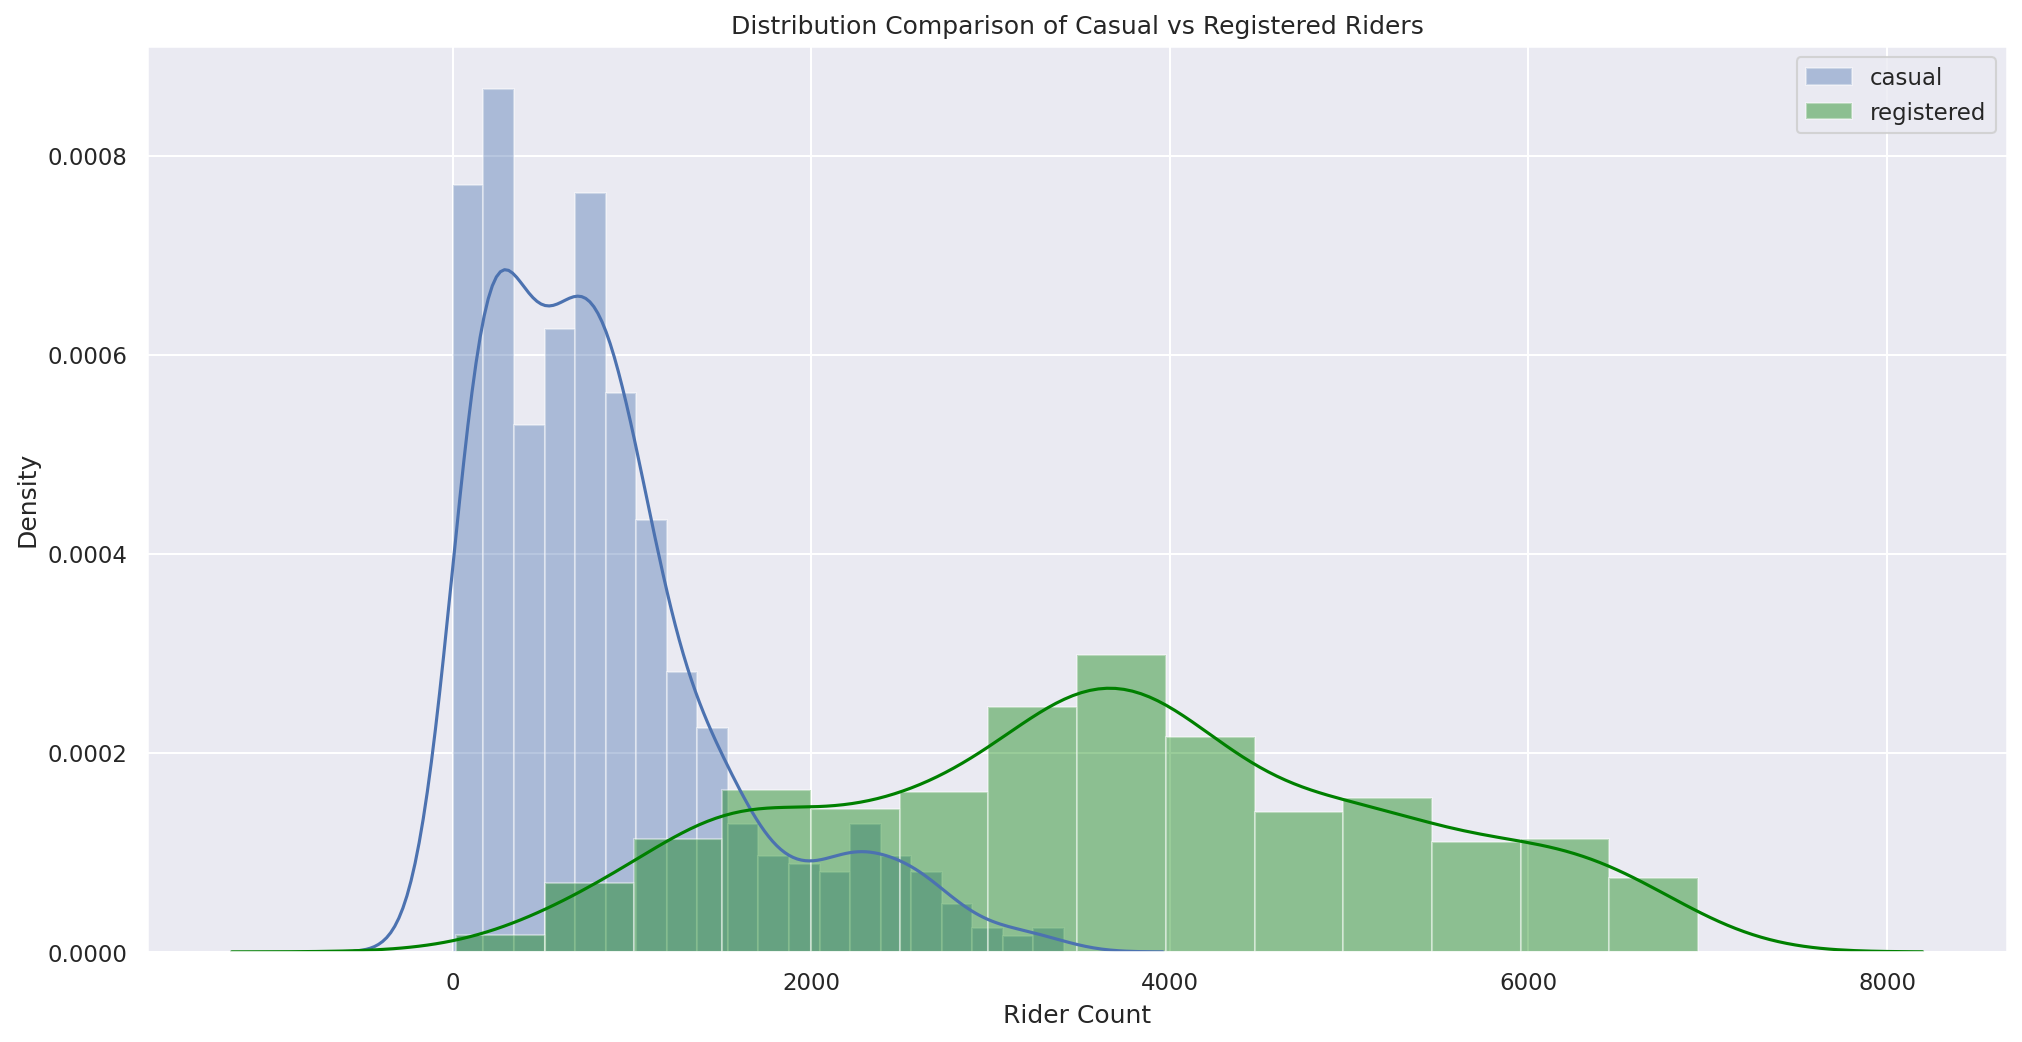

In [16]:
# BEGIN SOLUTION
sns.distplot(daily_counts['casual'], label='casual')
sns.distplot(daily_counts['registered'],  label='registered', color='green')
plt.legend()
plt.title("Distribution Comparison of Casual vs Registered Riders")
plt.xlabel("Rider Count")
plt.ylabel("Density");
# plt.savefig("images/casual_v_registered.png", bbox_inches='tight', dpi=300);
# END SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 
<!--
BEGIN QUESTION
name: q2b
points: 2
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** The casual riders distribution has a sharp peak at 1000 that may be bimodal. This distribution is skewed right and has a long right tail with a small set of daily counts around 2500. The distribution of registered riders has a more symmetric distribution centered around almost 4000 daily riders. This distribution does not have heavy skew. Its spread is much wider than the casual riders.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2c

The density plots do not show us how the counts for registered and casual riders vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `bike` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line (just as you saw in Data 8). Color the points in the scatterplot according to whether or not the day is a working day (your colors do not have to match ours exactly, but they should be different based on whether the day is a working day). 

There are many points in the scatter plot, so make them small to help reduce overplotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. 

<img src='images/casual_registered_working_nonworking.png' width="600px" />

**Hints:** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws`.

<!--
BEGIN QUESTION
name: q2c
points: 2
manual: true
-->

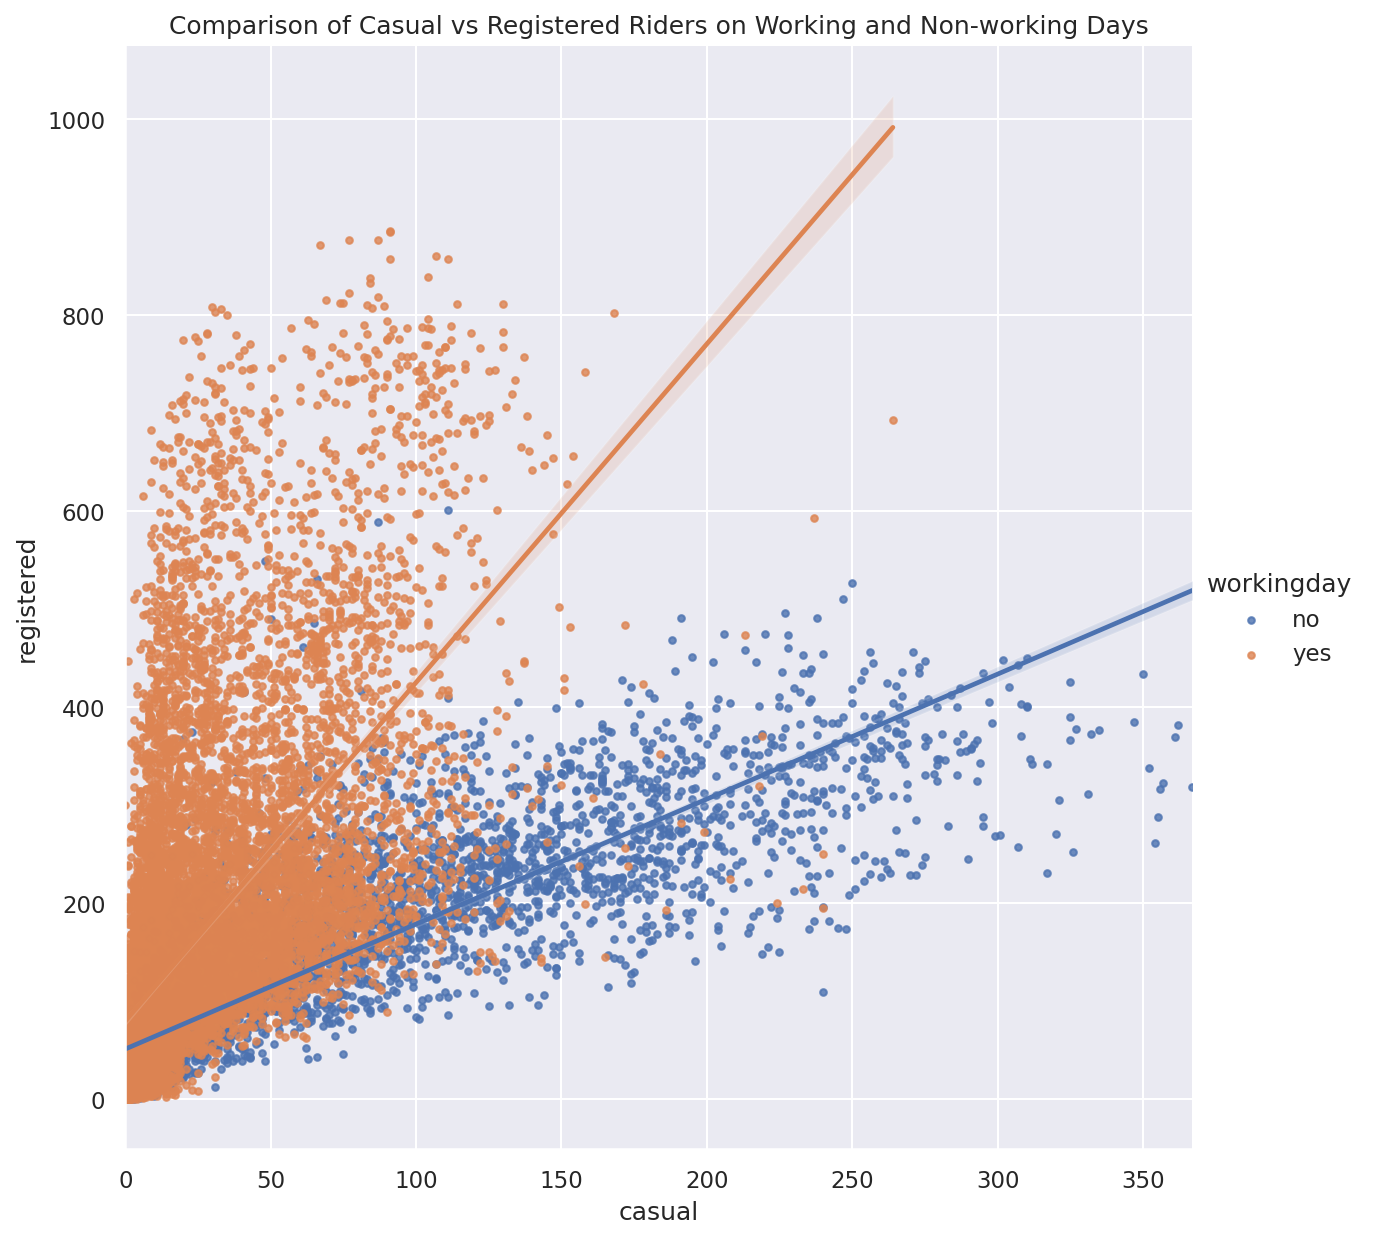

In [17]:
# Make the font size a bit bigger
sns.set(font_scale=1)
# BEGIN SOLUTION
sns.lmplot(x="casual", y="registered", hue="workingday",
           data=bike, fit_reg=True, height=8, scatter_kws={"s": 10})
plt.title("Comparison of Casual vs Registered Riders on Working and Non-working Days");
# plt.savefig("images/casual_registered_working_nonworking.png", bbox_inches='tight', dpi=300);
# END SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend? What effect does [overplotting](http://www.textbook.ds100.org/ch/06/viz_principles_2.html) have on your ability to describe this relationship?

<!--
BEGIN QUESTION
name: q2d
points: 2
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** There appears to be a linear relationship between the counts for registered and casual riders, and this relationship depends on whether the day is a work day or a weekend day. Due to overplotting, it's not possible to see the shape of the blue dataset (workingday=no) because it is occluded, and it is also difficult to determine the degree to which values are concentrated around the regression lines near 0.

<!-- END QUESTION -->



---
## 3: Visualization

### Question 3

#### Question 3a Bivariate Kernel Density Plot
 
To address overplotting, let's try visualizing the data with another technique, the bivariate kernel density estimate.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

The result we wish to achieve should be a plot that looks like this:

<img src='images/bivariate_kde_of_daily_rider_types.png' width="600px" />

You can think of this plot as an overhead countour or topographical map, where the "high" regions are those with more data points, and "low" regions are those with fewer data points.

A basic kde plot of all the data is quite easy to generate. However, this plot includes both weekend and weekday data, which isn't what we want (see example figure above).

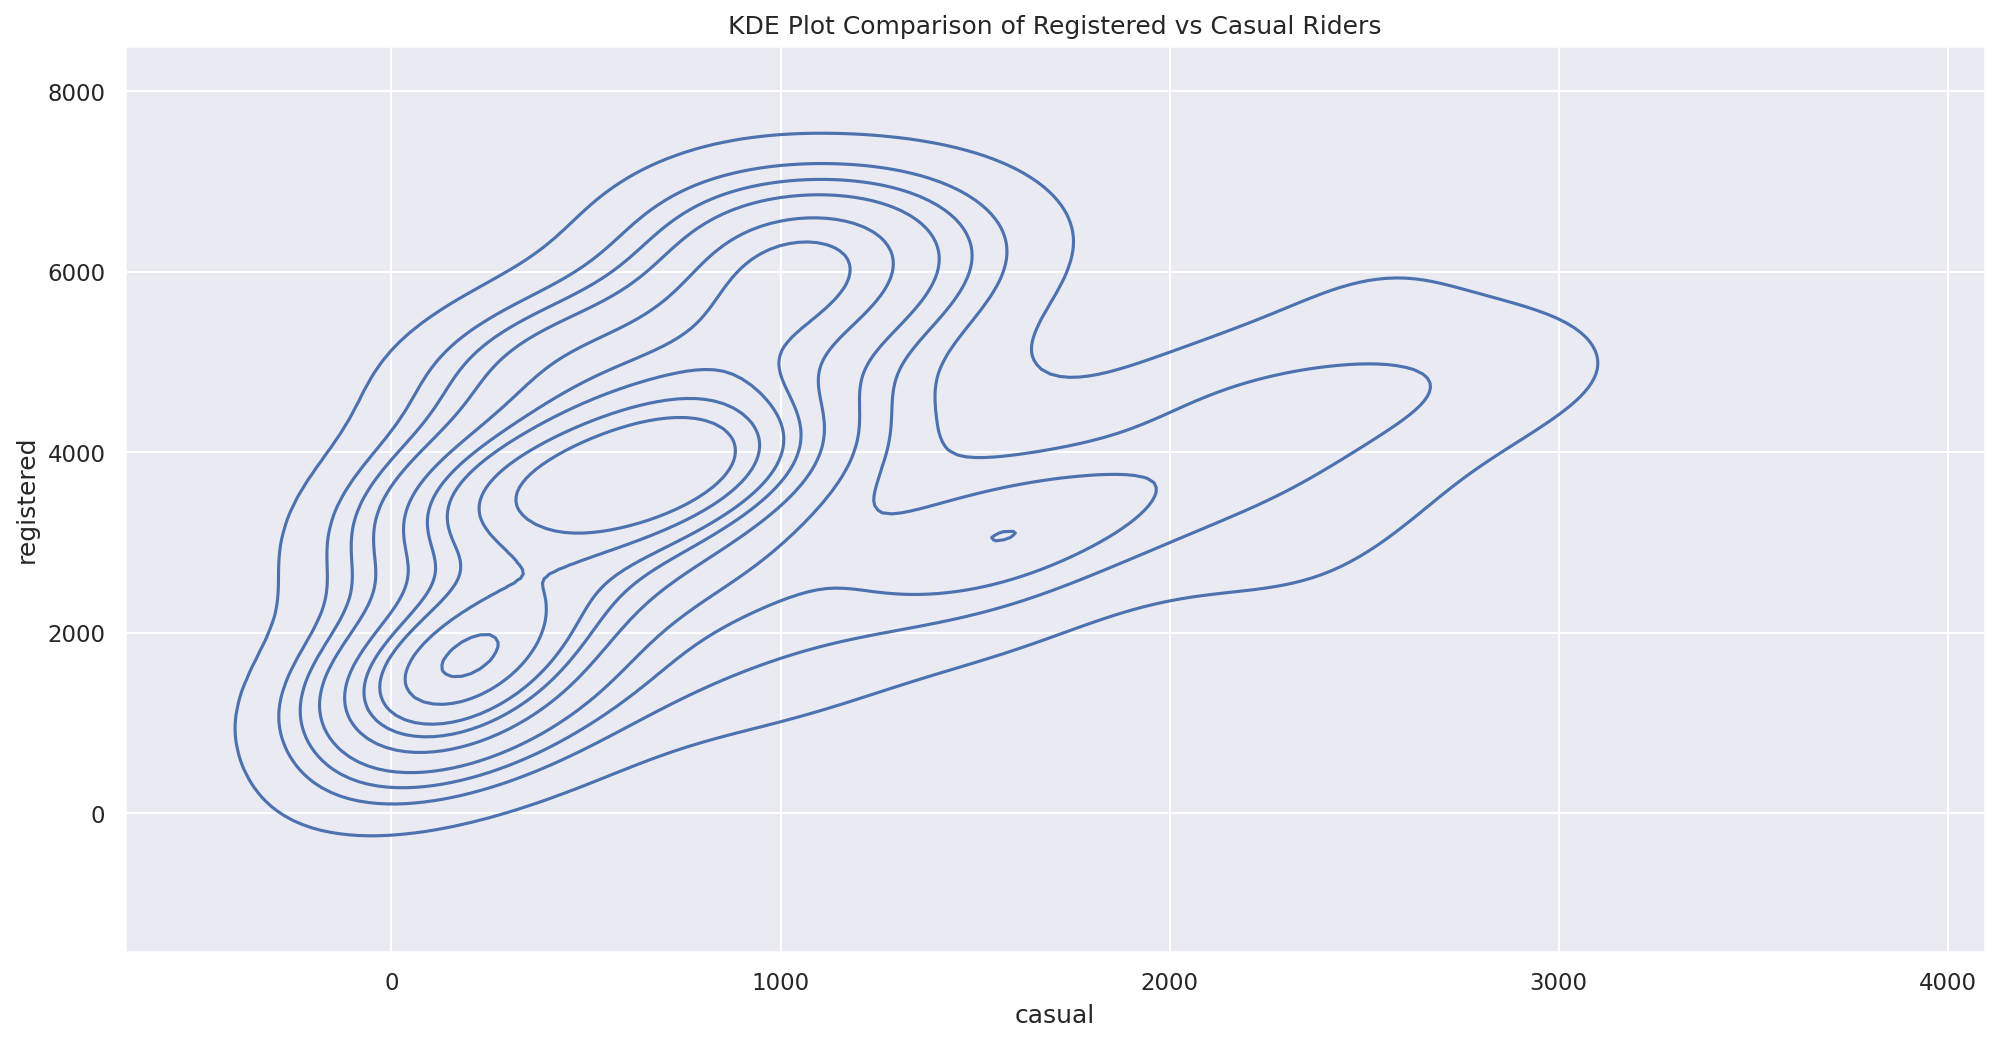

In [18]:
sns.kdeplot(x=daily_counts['casual'], y=daily_counts['registered'])
plt.title('KDE Plot Comparison of Registered vs Casual Riders');

<!-- BEGIN QUESTION -->

Generating the plot with weekend and weekday separated can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish if you do not want to follow the walkthrough.

**Hints:** 
* You can use `loc` with a boolean array and column names at the same time
* You will need to call kdeplot twice.
* Check out this [guide](https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#matplotlib-pyplot-and-pylab-how-are-they-related) to see an example of how to create a legend. In particular, look at how the example in the guide makes use of the `label` argument in the call to `plt.plot()` and what the `plt.legend()` call does. This is a good exercise to learn how to use examples to get the look you want.
* You will want to set the `cmap` parameter of `kdeplot` to `"Reds"` and `"Blues"` (or whatever two contrasting colors you'd like). You are required for this question to use two sets of contrasting colors for your plots.

After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version. Please submit your work with `shade=False`. 
<!--
BEGIN QUESTION
name: q3a
points: 5
manual: true
-->

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


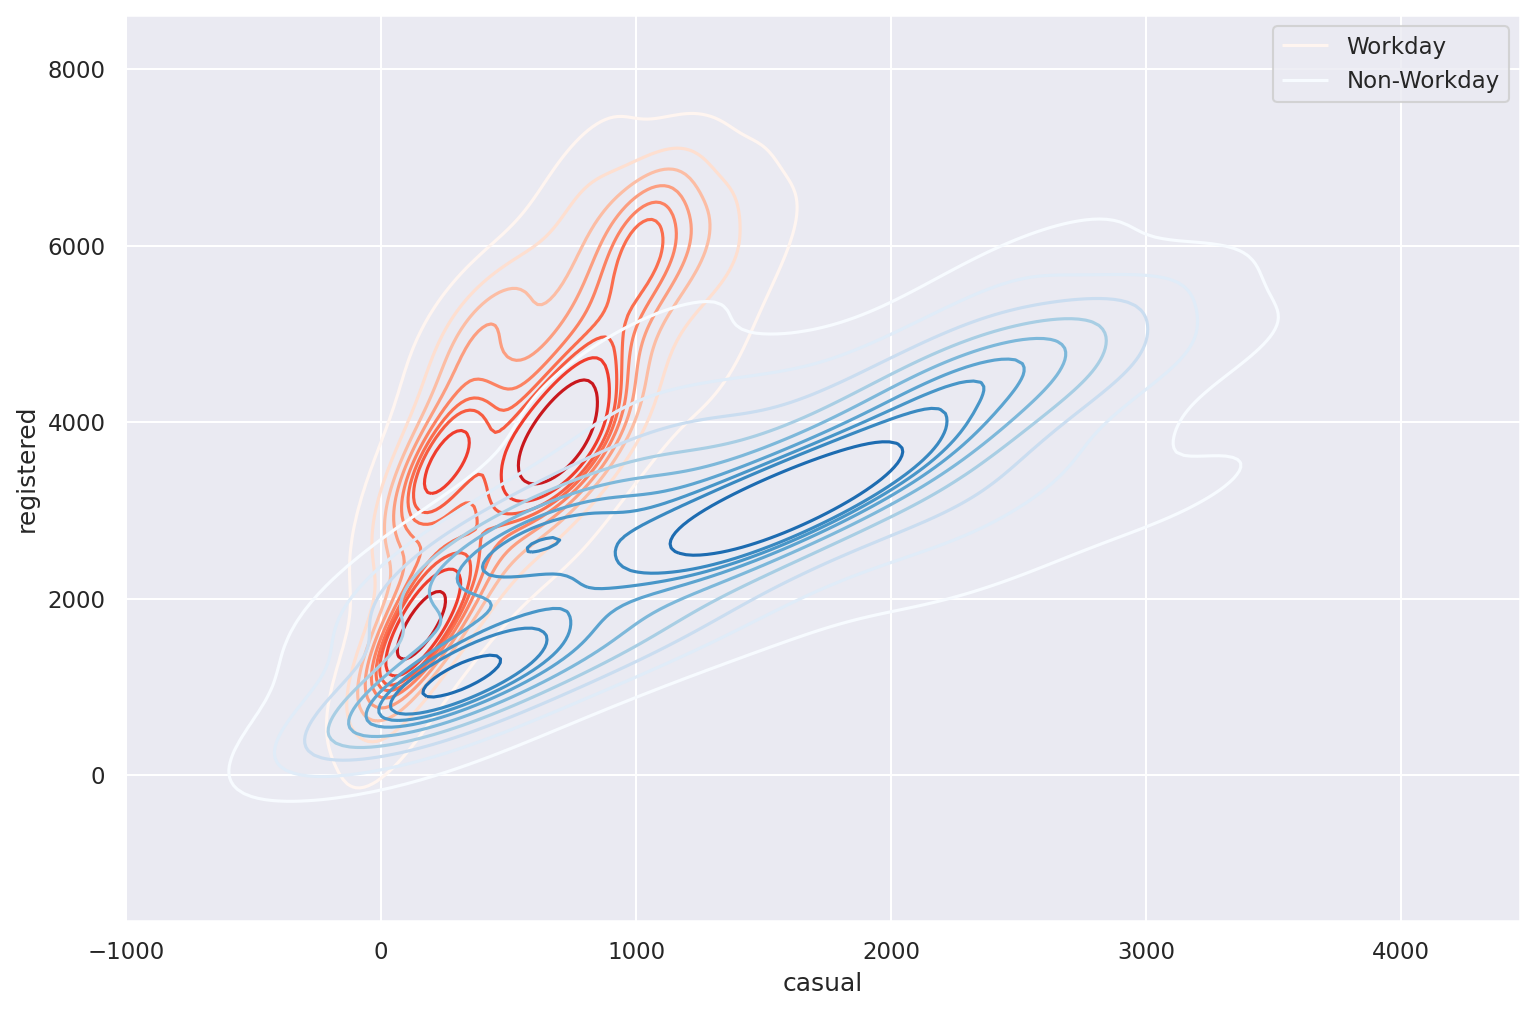

In [19]:
# Set 'is_workingday' to a boolean array that is true for all working_days
is_workingday = ...

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on workdays
casual_workday = ...
registered_workday = ...

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
...

# Repeat the same steps above but for rows corresponding to non-workingdays
casual_non_workday = ...
registered_non_workday = ...

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for non-workingday rides
# BEGIN SOLUTION
plt.figure(figsize=(12,8))
is_workingday = daily_counts['workingday'] == 'yes'
casual_workday = daily_counts.loc[is_workingday, 'casual']
registered_workday = daily_counts.loc[is_workingday, 'registered']

sns.kdeplot(casual_workday, registered_workday, cmap="Reds", label="Workday")

not_workingday = ~is_workingday
casual_non_workday = daily_counts.loc[not_workingday, 'casual']
registered_non_workday = daily_counts.loc[not_workingday, 'registered']

sns.kdeplot(casual_non_workday, registered_non_workday, cmap="Blues", label="Non-Workday")

plt.legend();
# plt.savefig("images/bivariate_kde_of_daily_rider_types.png", bbox_inches='tight', dpi=300);
# END SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Question 3b

What additional details can you identify from this contour plot that were difficult to determine from the scatter plot?

<!--
BEGIN QUESTION
name: q3b
points: 3
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** The association between registered and casual riders appears linear for both categories of days, but with a much higher slope for workdays. We can see from the contour plot that the variability is higher on non-wordays, and the non-workday joint distribution is bimodal. The workday joint distribution appears to be trimodal.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 4: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (weekday vs. weekend).

<img src="images/joint_distribution_of_daily_rider_types.png" width="600px" />

**Hints**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.
* `plt.suptitle` from lab 1 can be handy for setting the title where you want.
* `plt.subplots_adjust(top=0.9)` can help if your title overlaps with your plot

<!--
BEGIN QUESTION
name: q4
points: 2
manual: true
-->

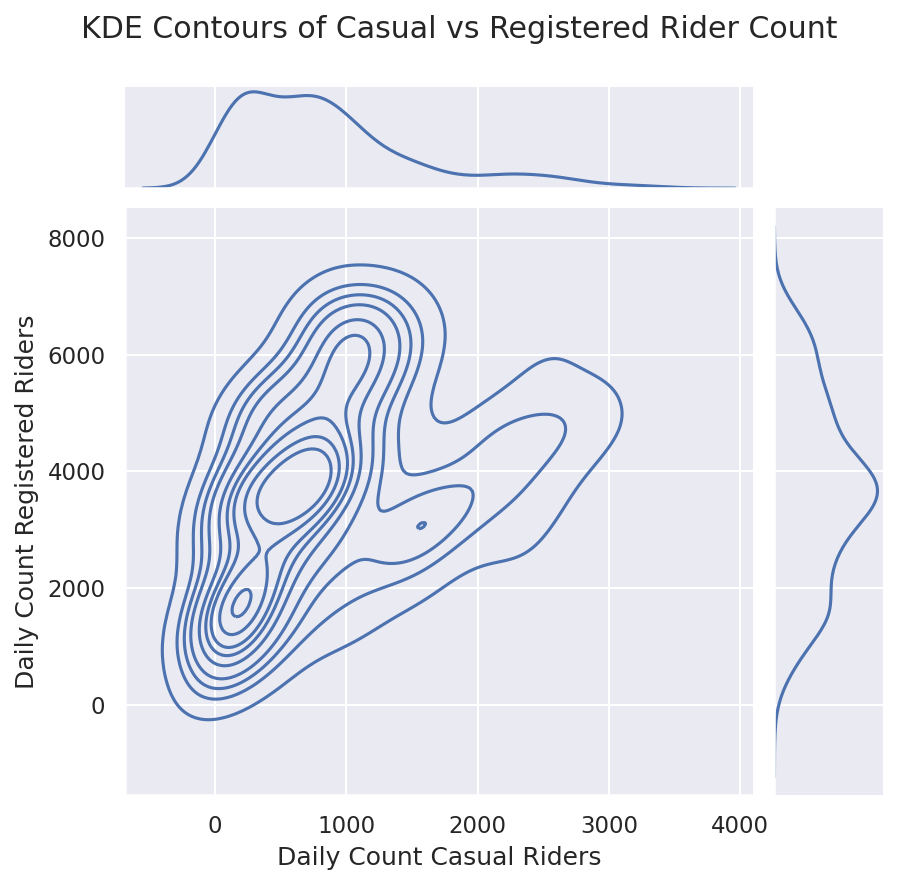

In [20]:
# BEGIN SOLUTION
g = sns.jointplot(x="casual", y="registered", data=daily_counts, kind="kde");
g.set_axis_labels("Daily Count Casual Riders", "Daily Count Registered Riders")
plt.suptitle("KDE Contours of Casual vs Registered Rider Count")
plt.subplots_adjust(top=0.9);
# plt.savefig("images/joint_distribution_of_daily_rider_types", bbox_inches='tight', dpi=300);
# END SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---
## 5: Understanding Daily Patterns

### Question 5

#### Question 5a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset**, stratified by rider type.  

Your plot should look like the plot below. While we don't expect your plot's colors to match ours exactly, your plot should have different colored lines for different kinds of riders.

<img src="images/diurnal_bikes.png" width="600px"/>

<!--
BEGIN QUESTION
name: q5a
points: 2
manual: true
-->

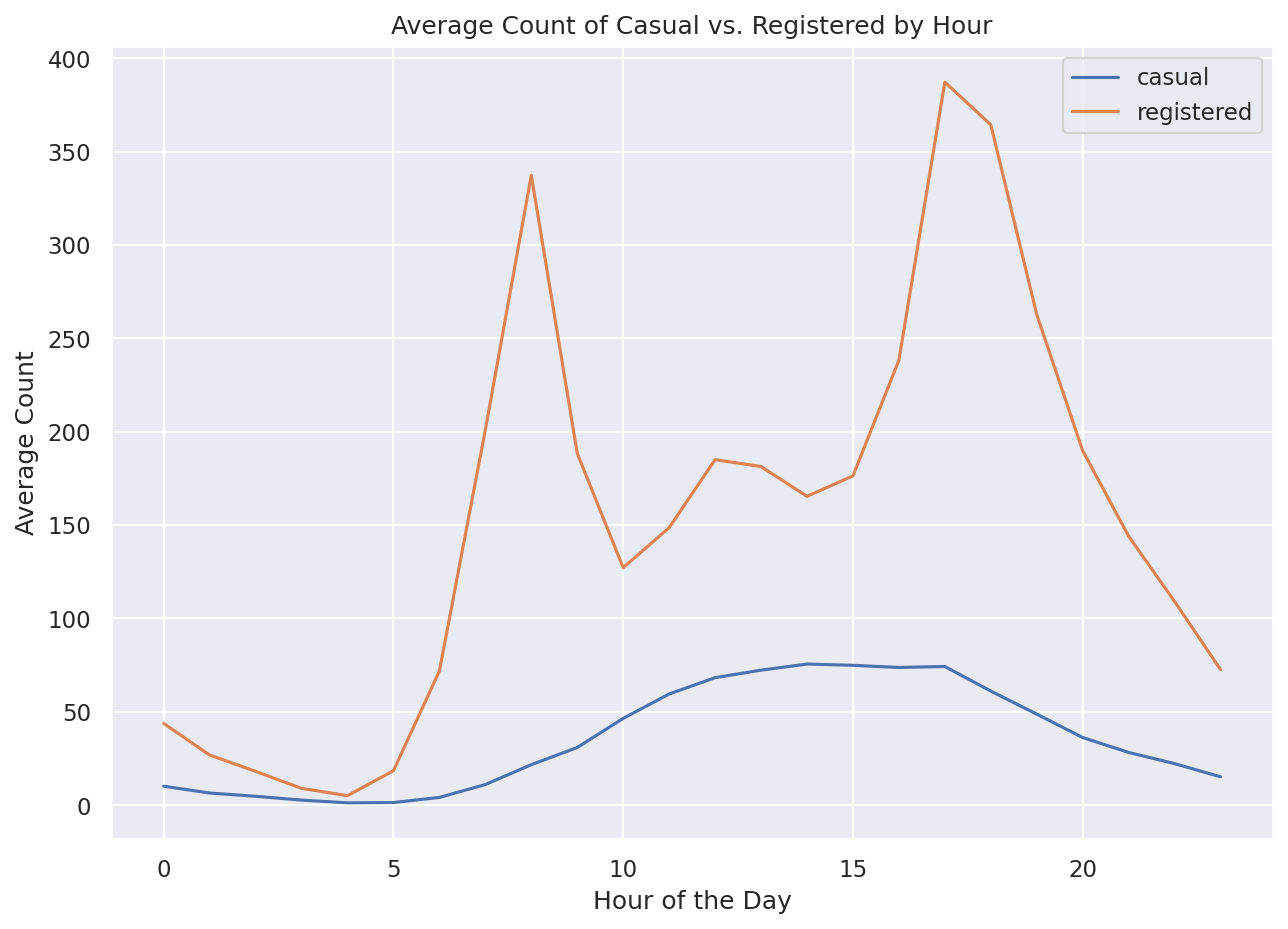

In [21]:
# BEGIN SOLUTION
plt.figure(figsize=(10, 7))
hourly_means = bike.groupby('hr').mean()
sns.lineplot(x = hourly_means.index, y = hourly_means['casual'], label = 'casual')
sns.lineplot(x = hourly_means.index, y = hourly_means['registered'], label = 'registered')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.title('Average Count of Casual vs. Registered by Hour');
# END SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Question 5b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered riders' distribution.
<!--
BEGIN QUESTION
name: q5b
points: 2
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** In the above plot we see strong evidence of daily patterns in both datasets. The casual riders appear to ride throughout the day with peak hours in the mid-afternoon. Alternatively, while the registered riders also ride more during the day than at night there are very strong spikes during the morning and evening commute hours with a small bump during lunch.

<!-- END QUESTION -->

---
## 6: Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

### Question 6

#### Question 6a
Create a new column `prop_casual` in the `bike` DataFrame representing the proportion of casual riders out of all riders for each record.
<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [22]:
# BEGIN SOLUTION
bike['prop_casual'] = bike['casual'] / (bike['casual'] + bike['registered'])
# END SOLUTION

In [23]:
grader.check("q6a")

q6a passed!

#### Question 6b
In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

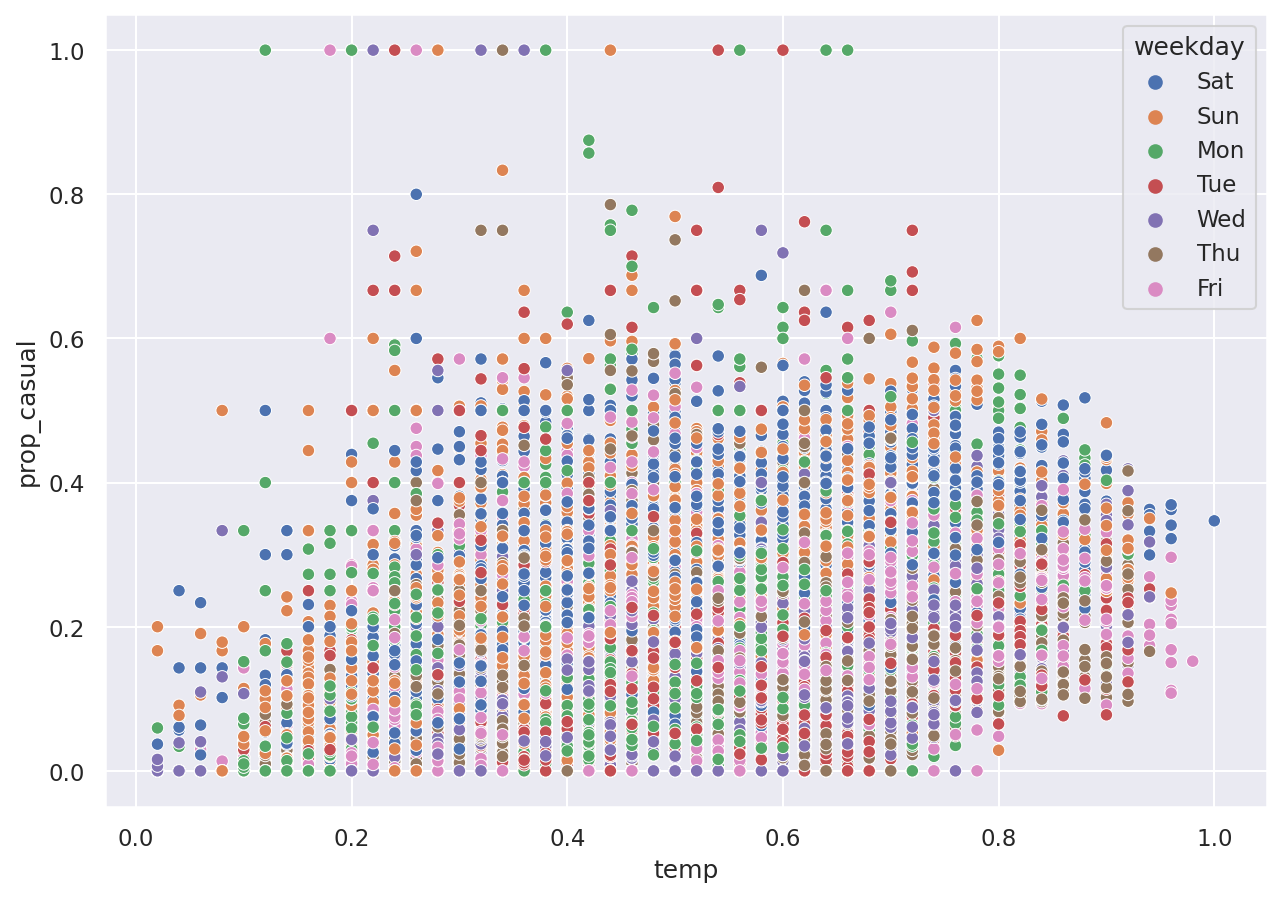

In [24]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

We could attempt linear regression using `sns.lmplot` as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

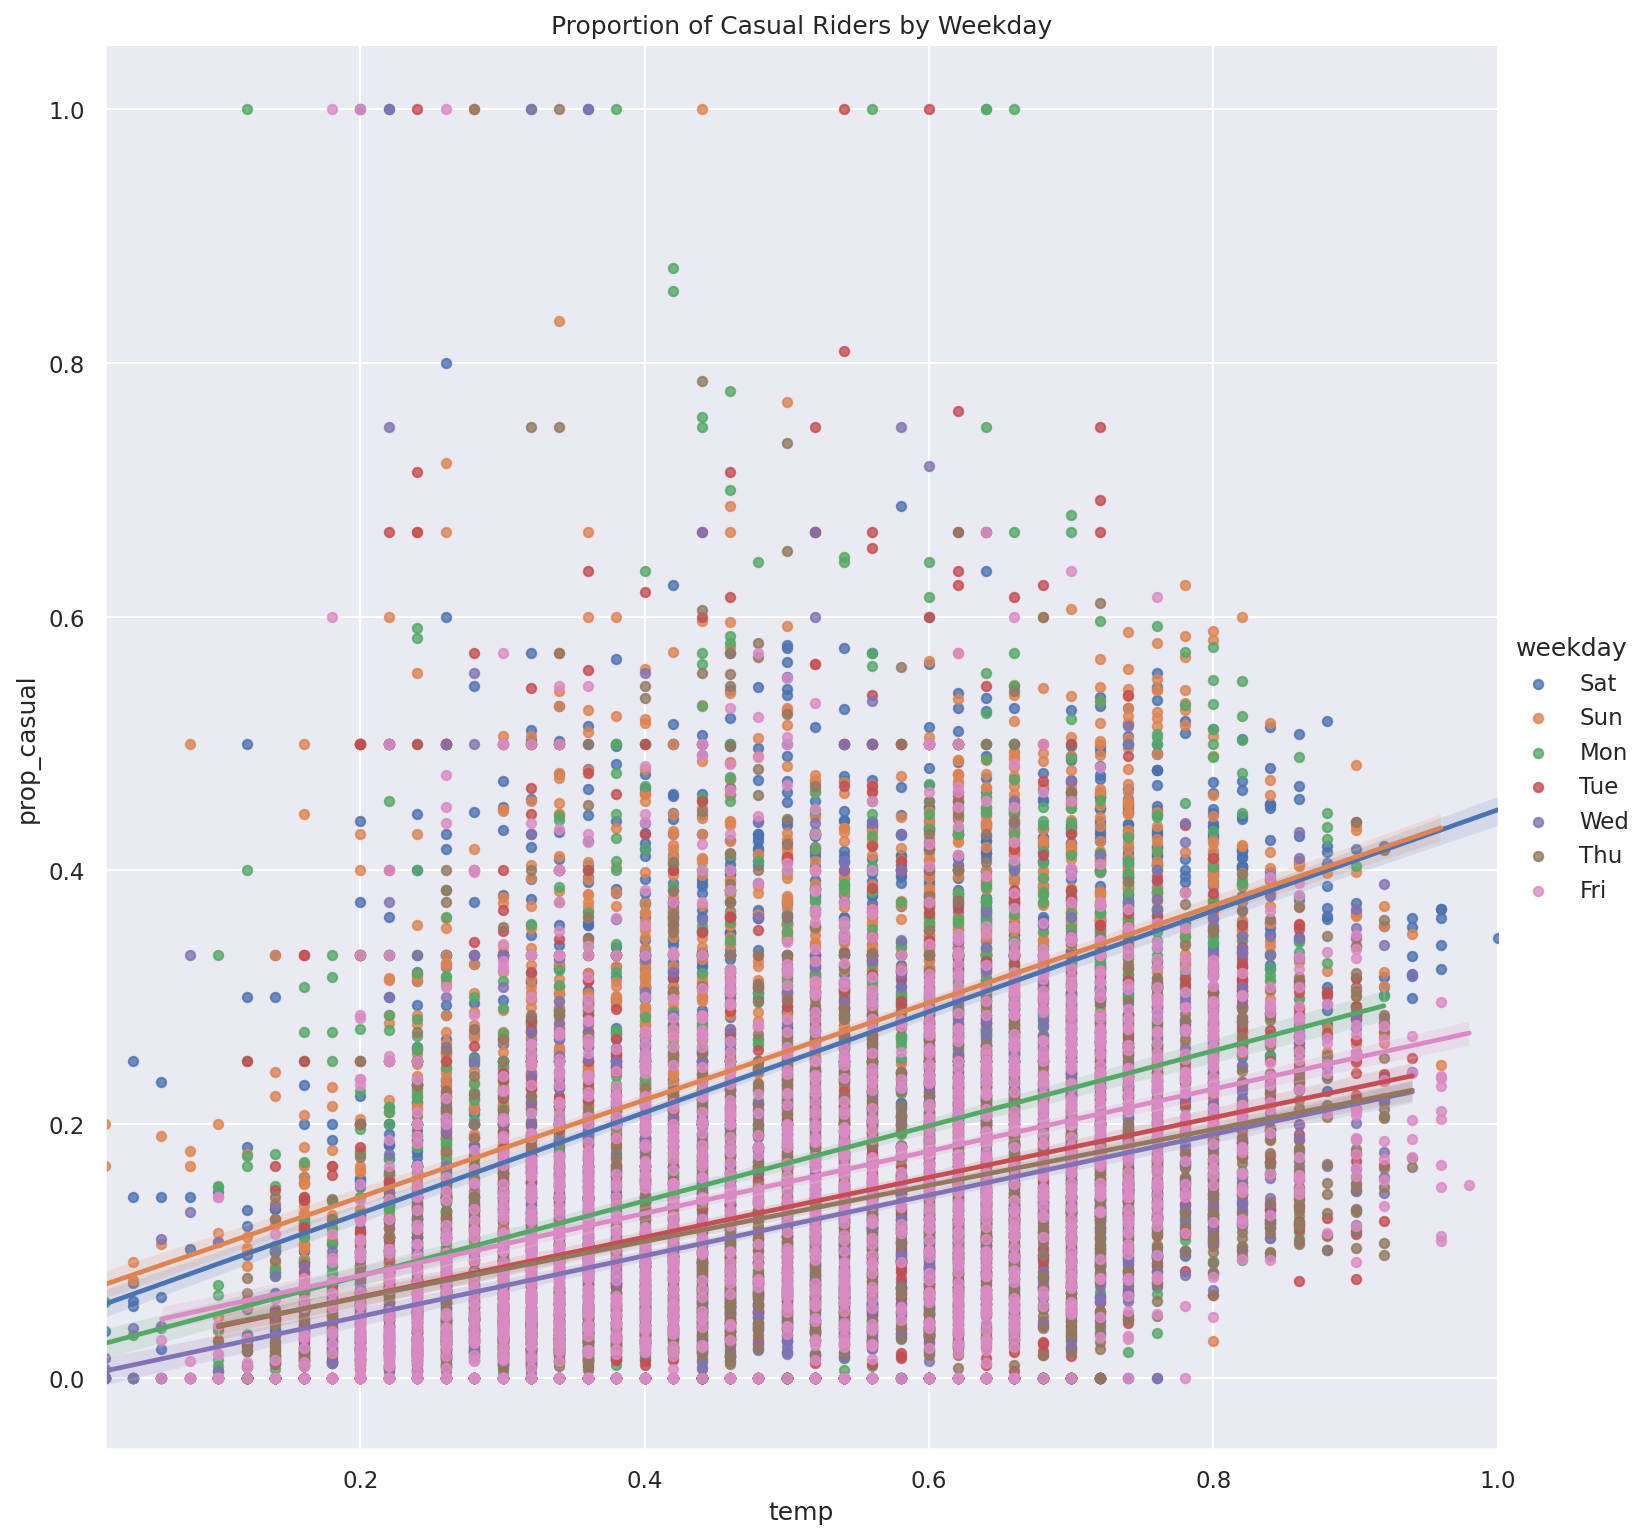

In [25]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The red curve shown is a smoothed version of the scatterplot.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


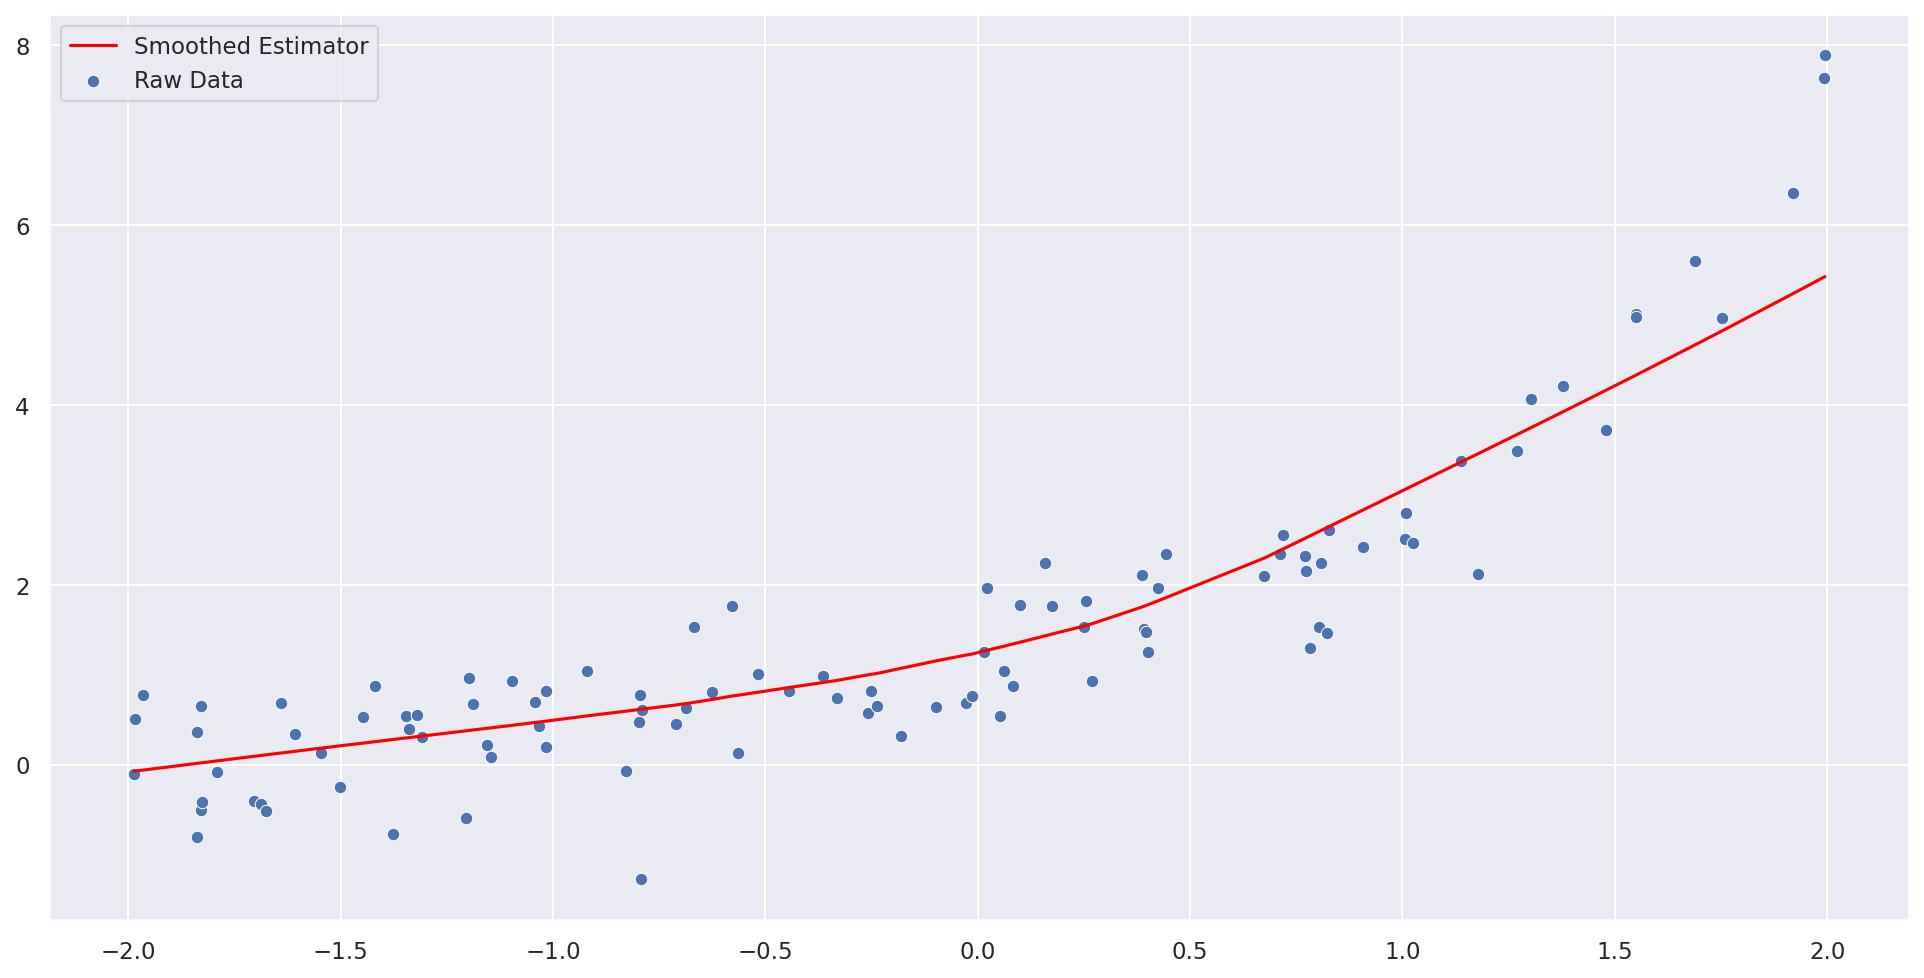

In [26]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

<!-- BEGIN QUESTION -->

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

<img src="images/curveplot_temp_prop_casual.png" width="600px" />

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

You do not need to match the colors on our sample plot as long as the colors in your plot make it easy to distinguish which day they represent.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate.

* Look at the top of this homework notebook for a description of the temperature field to know how to convert to Fahrenheit. By default, the temperature field ranges from 0.0 to 1.0. In case you need it, $\text{Fahrenheit} = \text{Celsius} * \frac{9}{5} + 32$.

Note: If you prefer plotting temperatures in Celsius, that's fine as well!
<!--
BEGIN QUESTION
name: q6b
points: 4
manual: true
-->

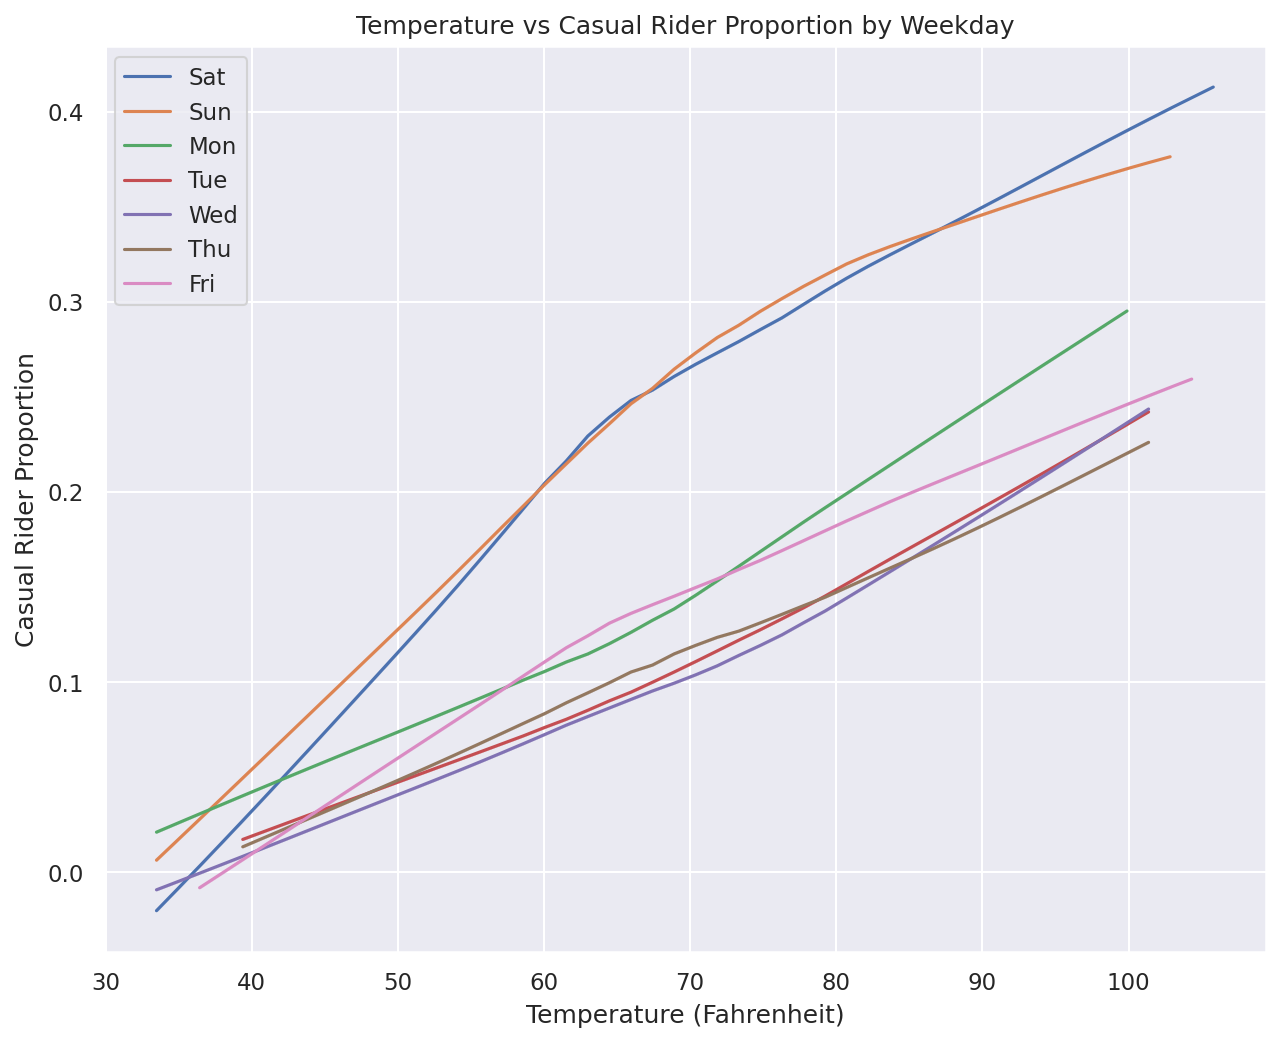

In [27]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,8))
# BEGIN SOLUTION
for day in bike['weekday'].unique():
    this_day = bike[bike['weekday'] == day].copy()
    this_day['temp'] = this_day['temp'] * 41 * 9 / 5 + 32 
    ysmooth = lowess(this_day['prop_casual'], this_day['temp'], return_sorted=False)
    sns.lineplot(x=this_day['temp'], y=ysmooth, label=day)

plt.title("Temperature vs Casual Rider Proportion by Weekday")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Casual Rider Proportion")
plt.legend();
# plt.savefig("images/curveplot_temp_prop_casual", bbox_inches='tight', dpi=300);
# END SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Question 6c
What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?
<!--
BEGIN QUESTION
name: q6c
points: 2
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** As temperature increases, the proportion of casual riders increases as well, and this trend appears to continue even into very hot weather. Weekends (Saturday, Sunday) have higher proportion of casual riders (which we saw before). There are four distinct types of days: weekends, Mondays, Fridays, and mid-week days. 

<!-- END QUESTION -->



## Question 7: Expanding our Analysis

<!-- BEGIN QUESTION -->

### Question 7
#### Question 7A

Imagine you are working for a Bike Sharing Company that collaborates with city planners, transportation agencies, and policy makers in order to implement bike sharing in a city. These stakeholders would like to reduce congestion and lower transportation costs. They also want to ensure the bike sharing program is implemented equitably. In this sense, equity is a social value that is informing the deployment and assessment of your bike sharing technology. 

Equity in transportation includes: improving the ability of people of different socio-economic classes, genders, races, and neighborhoods to access and afford the transportation services, and assessing how inclusive transportation systems are over time. 

Do you think the `bike` data as it is can help you assess equity? If so, please explain. If not, how would you change the dataset? You may discuss how you would change the granularity, what other kinds of variables you'd introduce to it, or anything else that might help you answer this question.

<!--
BEGIN QUESTION
name: q7a
points: 2
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** Many answers to this question– some ideas include adding location, riders by gender/race/income, average cost per ride, etc... 

<!-- END QUESTION -->

In [28]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<!-- BEGIN QUESTION -->

#### Question 7B
[Bike sharing is growing in popularity](https://www.bts.gov/newsroom/bike-share-stations-us) and new cities and regions are making efforts to implement bike sharing systems that complement their other transportation offerings. The [goals of these efforts](https://www.wired.com/story/americans-falling-in-love-bike-share/) are to have bike sharing serve as an alternate form of transportation in order to alleviate congestion, provide geographic connectivity, reduce carbon emissions, and promote inclusion among communities.

Bike sharing systems have spread to many cities across the country. The company you work for asks you to determine the feasibility of expanding bike sharing to additional cities of the U.S. 

Based on your plots in this assignment, what would you recommend and why? Please list at least two reasons why, and mention which plot(s) you drew you analysis from. 

**Note**: There isn't a set right or wrong answer for this question, feel free to come up with your own conclusions based on evidence from your plots! 

<!--
BEGIN QUESTION
name: q7b
points: 2
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION**: There isn't a set right or wrong answer for this question, feel free to come up with your own conclusions based on evidence from your plots!

<!-- END QUESTION -->

In [29]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [30]:
grader.check_all()

q1a passed!

q1b passed!

q1c passed!

q6a passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [31]:
# Save your notebook first, then run this cell to export your submission.
grader.export()

<IPython.core.display.Javascript object>